In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# Mount with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
budget = pd.read_csv("/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/budget_eval.csv",index_col = 0)

In [15]:
budget.columns

Index(['Tuition and fees, after deducting discounts and allowances',
       'Private operating grants and contracts',
       'Sales and services of educational activities',
       'Gifts, including contributions from affiliated organizations',
       'Student services - Current year total',
       'Instruction - Current year total',
       'Scholarships and fellowships expenses -- Current year total',
       'Research - Current year total',
       'Academic support - Current year total', 'unitid', 'year',
       'Total Profit', 'gen_profit', 'label', 'Gini_gender', 'Gini_ethnics',
       'Gini_income', 'edu_fairness_score', 'institution_type', 'is_good'],
      dtype='object')

In [4]:
budget = budget[budget.institution_type == 'Public'].drop(['Gini_gender', 'Gini_ethnics', 'Gini_income', 'institution_type'], axis = 1)
budget_good = budget[budget.is_good == 1]
budget_bad = budget[budget.is_good == 0]

In [5]:
Income = ['Tuition and fees, after deducting discounts and allowances',
       'Private operating grants and contracts',
       'Sales and services of educational activities',
       'Gifts, including contributions from affiliated organizations']

Expense = ['Student services - Current year total',
           'Instruction - Current year total',
           'Scholarships and fellowships expenses -- Current year total',
           'Research - Current year total',
           'Academic support - Current year total']

In [6]:
income_good = budget_good[Income].copy()

total = np.zeros(len(budget_good))
for i in Income:
    total += budget_good[i]

for i in Income:
    income_good[i] /= total
    

In [7]:
income_bad = budget_bad[Income].copy()

total = np.zeros(len(budget_bad))
for i in Income:
    total += budget_bad[i]

for i in Income:
    income_bad[i] /= total
    

In [8]:
expense_good = budget_good[Expense].copy()

total = np.zeros(len(budget_good))
for i in Expense:
    total += budget_good[i]

for i in Expense:
    expense_good[i] /= total
    

In [9]:
expense_bad = budget_bad[Expense].copy()

total = np.zeros(len(budget_bad))
for i in Expense:
    total += budget_bad[i]

for i in Expense:
    expense_bad[i] /= total

In [10]:
new = pd.DataFrame(income_good.mean())
new.reset_index(inplace=True)
new = new.rename(columns = {'index':'budget_type',0:'amount'})

In [11]:
new.head()

,budget_type,amount
0,"Tuition and fees, after deducting discounts an...",0.903816
1,Private operating grants and contracts,0.031798
2,Sales and services of educational activities,0.026442
3,"Gifts, including contributions from affiliated...",0.037943


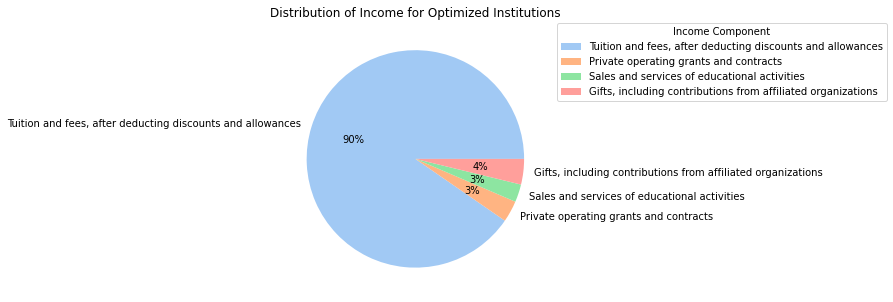

In [13]:
new = pd.DataFrame(income_good.mean())
new.reset_index(inplace=True)
new = new.rename(columns = {'index':'budget_type',0:'amount'})
#create pie chart
plt.figure(figsize=(17,5))
colors = sns.color_palette('pastel')[0:5]
plt.pie(new.amount, labels = new.budget_type, colors = colors,autopct='%.0f%%')
plt.title("Distribution of Income for Optimized Institutions")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Income Component',borderaxespad=0)


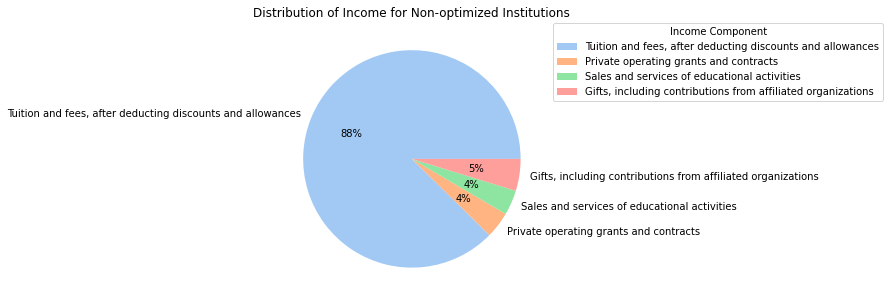

In [ ]:
new = pd.DataFrame(income_bad.median())
new.reset_index(inplace=True)
new = new.rename(columns = {'index':'budget_type',0:'amount'})
#create pie chart
plt.figure(figsize=(17,5))
colors = sns.color_palette('pastel')[0:5]
plt.pie(new.amount, labels = new.budget_type, colors = colors,autopct='%.0f%%')
plt.title("Distribution of Income for Non-optimized Institutions")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Income Component',borderaxespad=0)

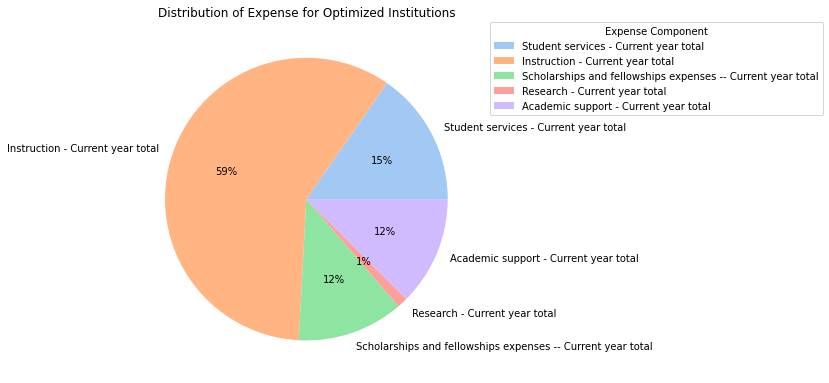

In [ ]:
new = pd.DataFrame(expense_good.mean())
new.reset_index(inplace=True)
new = new.rename(columns = {'index':'budget_type',0:'amount'})
#create pie chart
plt.figure(figsize=(17,6.5))
colors = sns.color_palette('pastel')[0:5]
plt.pie(new.amount, labels = new.budget_type, colors = colors,autopct='%.0f%%')
plt.title("Distribution of Expense for Optimized Institutions")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Expense Component',borderaxespad=0)

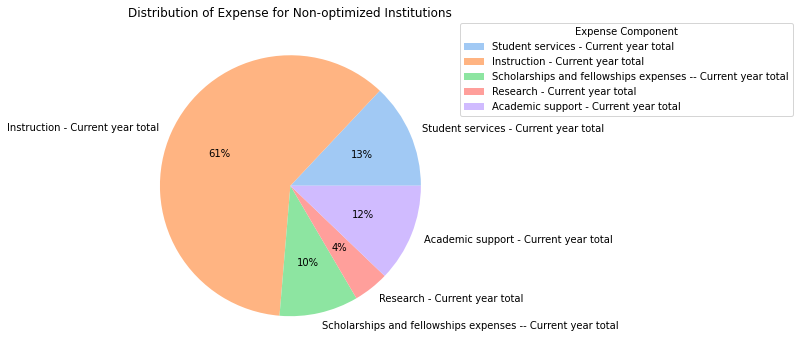

In [ ]:
new = pd.DataFrame(expense_bad.mean())
new.reset_index(inplace=True)
new = new.rename(columns = {'index':'budget_type',0:'amount'})
#create pie chart
plt.figure(figsize=(17,6))
colors = sns.color_palette('pastel')[0:5]
plt.pie(new.amount, labels = new.budget_type, colors = colors,autopct='%.0f%%')
plt.title("Distribution of Expense for Non-optimized Institutions")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Expense Component',borderaxespad=0)